In [166]:
import numpy as np
import pandas as pd

In [167]:
df = pd.read_csv('spam.csv')

In [168]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1073,ham,Lul im gettin some juicy gossip at the hospita...,NaN,NaN,NaN
1558,ham,Message from . I am at Truro Hospital on ext. ...,NaN,NaN,NaN
763,ham,Nothing but we jus tot u would ask cos u ba gu...,NaN,NaN,NaN
3187,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
4574,ham,Not directly behind... Abt 4 rows behind ?_...,NaN,NaN,NaN


In [169]:
df.shape

(5572, 5)

## Data Cleaning

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [171]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [172]:
df.sample(5)

,v1,v2
5386,ham,I'm at work. Please call
1486,ham,Hello lover! How goes that new job? Are you th...
3256,ham,"No, but you told me you were going, before you..."
4918,ham,Re your call; You didn't see my facebook huh?
4308,ham,He dint tell anything. He is angry on me that ...


In [173]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [174]:
df.sample(4)

,target,text
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...
2547,spam,"Text82228>> Get more ringtones, logos and game..."
1141,spam,I don't know u and u don't know me. Send CHAT ...
3524,ham,I not free today i haf 2 pick my parents up to...


In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [176]:
df['target'] = le.fit_transform(df['target'])

In [177]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [178]:
df.duplicated().sum()

np.int64(403)

In [179]:
df = df.drop_duplicates(keep='first')

In [180]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ?_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
df.sample(5)

,target,text
984,0,Yo guess what I just dropped
1889,0,I gotta collect da car at 6 lei.
2672,0,Super msg da:)nalla timing.
2085,0,Moji i love you more than words. Have a rich day
505,0,No it's waiting in e car dat's bored wat. Cos ...


([<matplotlib.patches.Wedge at 0x1f193faf640>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

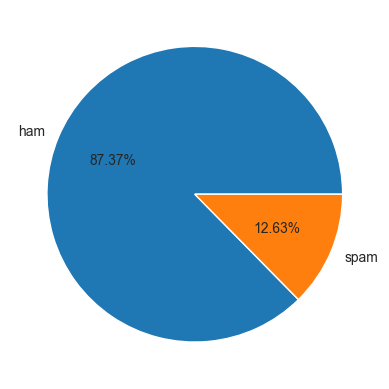

In [183]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')

In [184]:
import nltk

In [185]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
df['num_characters'] = df['text'].apply(len)

In [187]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ?_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [188]:
nltk.download('punkt_tab')
nltk.download('stopwords')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\snama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,36
5568,0,Will ?_ b going to esplanade fr home?,37,10
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [190]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [191]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [192]:
import seaborn as sns

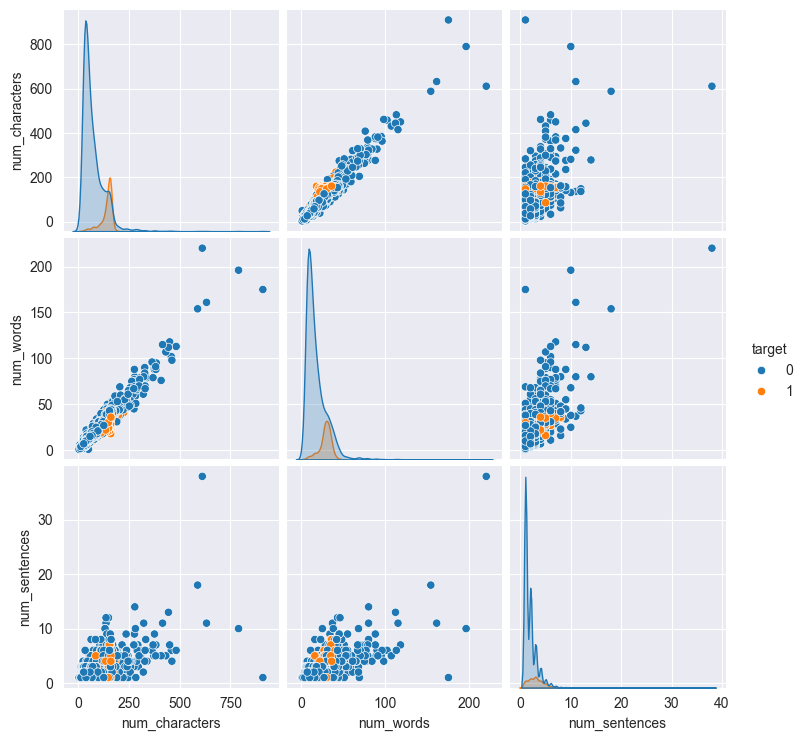

In [193]:
sns.pairplot(df,hue='target')

In [194]:
corelation = df.select_dtypes(include=['number']).corr()


<Axes: >

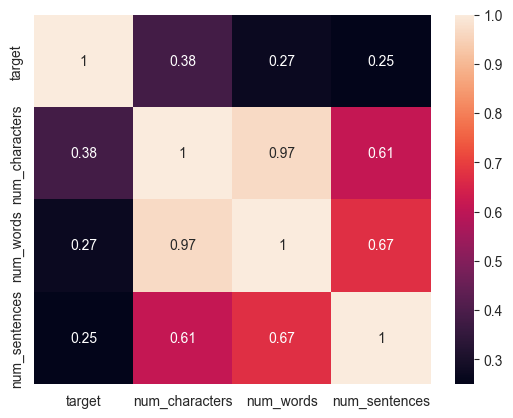

In [195]:
sns.heatmap(corelation,annot=True)

In [196]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

## Data Preprocessing
Lower Case
Tokenization
Removal Special Character
Remove stop words and punctuation
Stemming

In [197]:
def transform_text(text):
    text =text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [198]:
transform_text("I loved to do coding")

'love code'

In [199]:
df['transformed_text'] = df['text'].apply(transform_text)

In [200]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [201]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [202]:
spam_text = (
    df[df['target'] == 1]['transformed_text']
    .dropna()
    .astype(str)
    .str.cat(sep=" ")
)

spam_wc = wc.generate(spam_text)


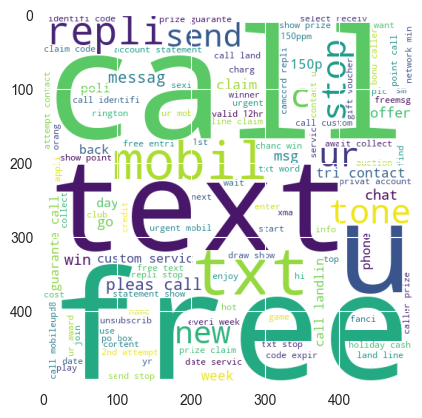

In [203]:
plt.imshow(spam_wc)

## Model Building

In [204]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [205]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [206]:
X.shape

(5169, 3000)

In [207]:
y = df['target'].values

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [210]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [211]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [212]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[788 108]
 [ 24 114]]
0.5135135135135135


In [213]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [214]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [216]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [217]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [218]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [219]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [220]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8702290076335878
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


In [221]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [222]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.971954,1.000000
8,ETC,0.979691,0.983471
5,RF,0.974855,0.982759
10,xgb,0.975822,0.974790
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
9,GBDT,0.947776,0.928571
7,BgC,0.960348,0.870229
6,AdaBoost,0.924565,0.840909


In [223]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
